In [2]:
import matplotlib.pyplot as plt
import numpy as np

# CONVERGENCE

In [3]:
physical_data = np.genfromtxt('StarCCM/convergence/physical_variables.csv', delimiter=',', skip_header=1)
residuals_data = np.genfromtxt('StarCCM/convergence/residuals.csv', delimiter=',', skip_header=1)

physical_header=["k (Vol. Avg.)", "Velocity (Vol. Avg.)"]
residuals_header=["Continuity", "X-Momentum", "Y-Momentum", "Z-Momentum", "Tke", "Tdr"]

iterations = physical_data[:,0]

print(residuals_data.shape)

(4998, 7)


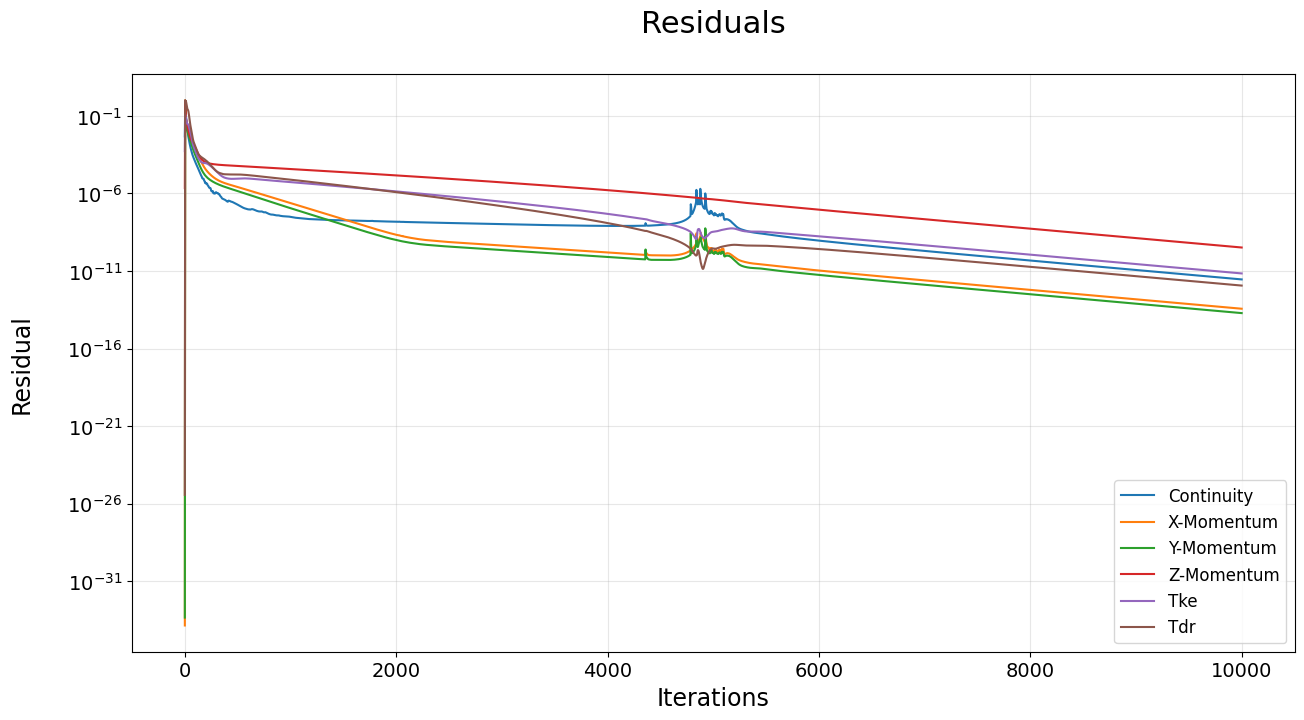

In [4]:
# PLOT RESIDUALS

figure = plt.figure(figsize=(15,7.5))

for i in range(6):
    plt.plot(iterations, residuals_data[:,i+1], label=residuals_header[i])

plt.xlabel('Iterations', size=17)
plt.xticks(fontsize=14)
plt.ylabel('Residual\n', size=17)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.grid(visible=True, which='both', alpha=0.3)
plt.legend(loc='lower right', fontsize=12)
plt.title("Residuals\n", size=22)
plt.savefig('images/residuals.jpg')

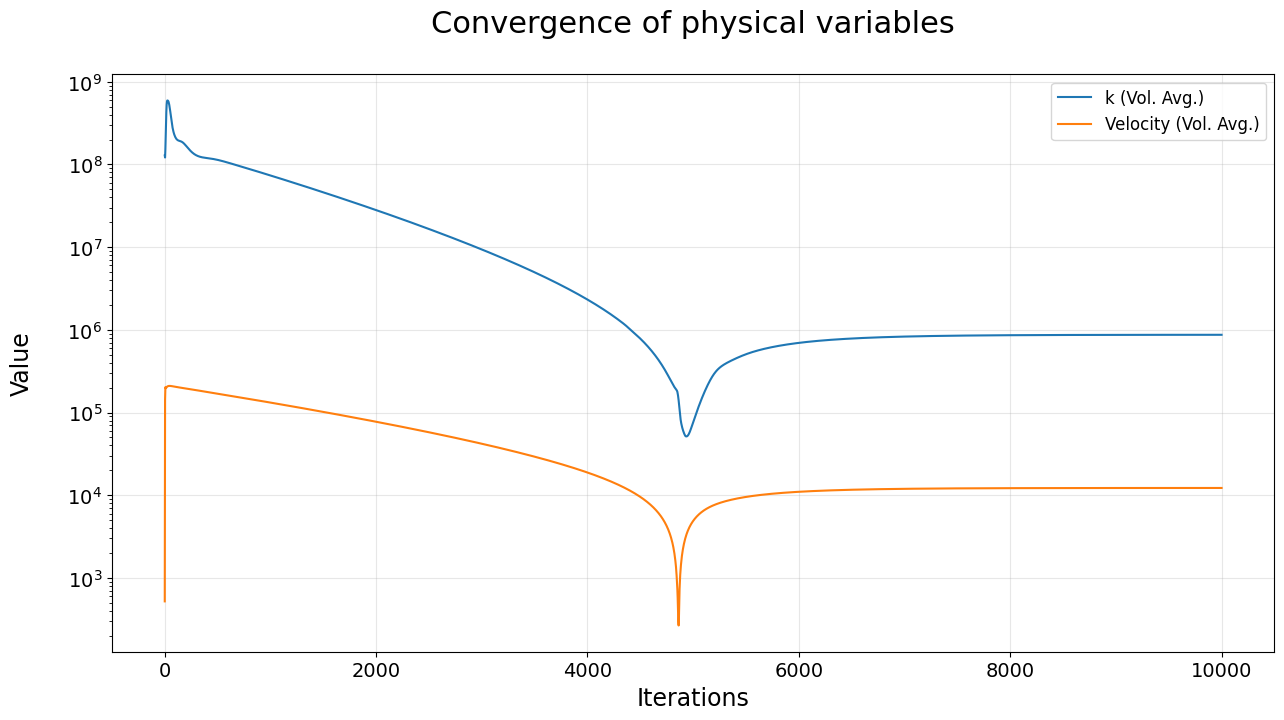

In [5]:
# PLOT PHYSICAL VARIABLES

figure = plt.figure(figsize=(15,7.5))

for i in range(2):
    plt.plot(iterations, physical_data[:,i+1], label=physical_header[i])

plt.xlabel('Iterations', size=17)
plt.xticks(fontsize=14)
plt.ylabel('Value\n', size=17)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.grid(visible=True, which='major', alpha=0.3)
plt.legend(fontsize=12)
plt.title("Convergence of physical variables\n", size=22)
plt.savefig('images/physical_convergence.jpg')

# RESULTS

In [6]:
# EXTRACT STAR DATA 
star_data = np.genfromtxt("data/star/k_plus_vs_yplus_doubleplaneprobe.csv", delimiter=',', skip_header=1)


mask_X = (star_data[:,0] <= 650) 
mask_Z = (star_data[:,2] <= 650)
mask = np.logical_and(mask_X, mask_Z)

star_data = star_data[mask, :]

star_k_plus = np.concatenate((star_data[:,1], star_data[:,3]))
star_y_plus = np.concatenate((star_data[:,0], star_data[:,2]))


In [7]:
# EXTRACT DNS DATA k+ / y+
dns_rms_data = np.genfromtxt("data/dns/rms.csv", delimiter='  ', skip_header=1)
dns_y_plus = dns_rms_data[:,2]
dns_u_rms = dns_rms_data[:,3]
dns_v_rms = dns_rms_data[:,4]
dns_w_rms = dns_rms_data[:,5]

dns_k_plus = 0.5*(np.square(dns_u_rms) + np.square(dns_v_rms) + np.square(dns_w_rms))

In [105]:
# COMPUTE ERROR
dns_y = dns_y_plus
dns_k = dns_k_plus
star_y = star_y_plus
star_k = star_k_plus

star_y_unique = [32.5, 113.75, 211.25, 308.75, 406.25, 503.75, 601.25]
idx = []
for i in range(len(star_y_unique)):
    diff = []
    for j in range(len(dns_y)):
        diff.append(abs(star_y_unique[i]-dns_y[j]))
    idx.append(np.argmin(diff))
    
star_k_unique = []
for i in range(len(star_y_unique)):
    data = []
    for j in range(len(star_y)):
        if abs(star_y[j] - star_y_unique[i]) < 0.1:
            data.append(star_k[j])      
    star_k_unique.append(np.mean(data))

error = np.subtract(star_k_unique, dns_k[idx])
error = np.divide(error, dns_k[idx])*100
print(error)

[-20.19400613  26.89146294   9.11367108   4.35580104   4.87513054
  10.87082053  23.66880476]


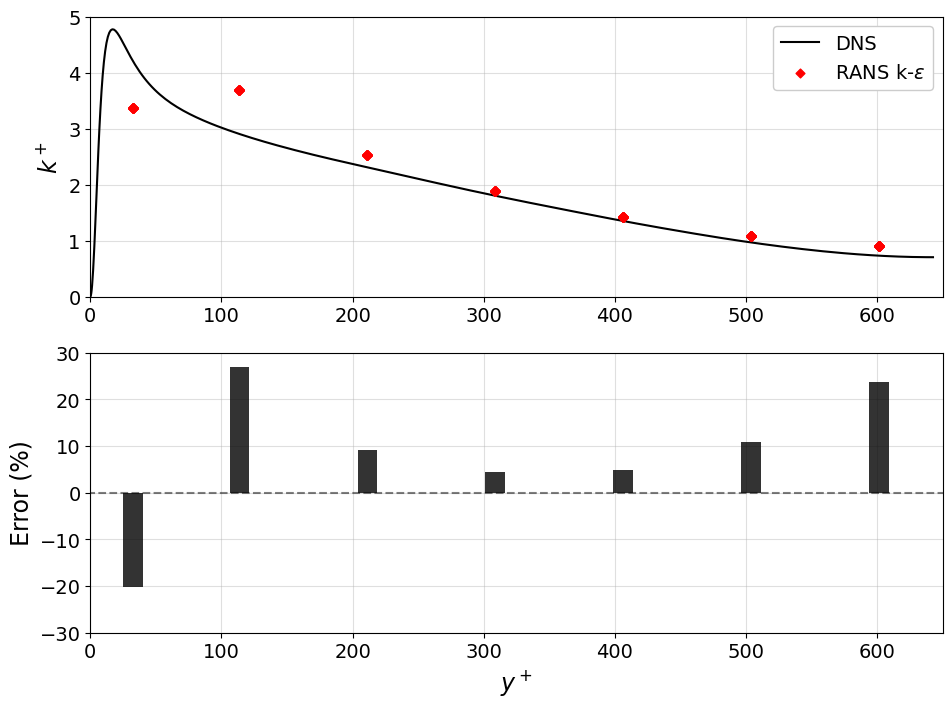

In [126]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(11,8))
ax1.plot(dns_y_plus,dns_k_plus, color='k', markersize=3, label='DNS', zorder=2)
ax1.scatter(star_y_plus, star_k_plus, color='r', marker='D', s=20, label=r"RANS k-$\epsilon$", zorder=3)
#ax1.set_xlabel(r"$y^+$", size=17)
ax1.tick_params(labelsize=14, labelbottom=True)
ax1.set_ylabel(r"$k^+$", size=17)
ax1.set_ylim(0,5)
ax1.set_xlim(0,650)
ax1.grid(visible=True, which='both', axis='both', alpha=0.4)
ax1.legend(framealpha=1, fontsize=14)

ax2.bar(star_y_unique, error, width=15, color='k', alpha=0.8, zorder=2)
ax2.hlines([0], xmin=-1000, xmax=1000, linestyle='--', color='k', alpha=0.5)
ax2.set_xlabel(r"$y^+$", size=17)
ax2.tick_params(labelsize=14)
ax2.set_ylabel("Error (%)", size=17)
ax2.set_ylim(-30, 30)
ax2.grid(visible=True, which='both', axis='both', alpha=0.4)

plt.savefig("images/k+_y+.jpg")